# Pontificia Universidad Católica de Chile - IMT2220-1
# TAREA 1 - CALCULO PARA CIENCIA DE DATOS #
## Grupo 5 ##
**Alumnos: Victor Bórquez - Larry Uribe**
**Lic. en Ingeniería en Ciencia de Datos**

**PREGUNTA 1- Regresion exponencial:**

In [24]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

**Respuesta A)** transformando la regresion exponencial a lineal para ello aplicamos logaritmos a ambos lados, desarrollo en b)


**Respuesta B)** Aplicando lo visto en clases, tenemos: 

$$
y = \alpha e^{\beta x}
$$
Luego, aplicando log natural a ambos lados tenemos:
$$
ln(y) = ln(\alpha e^{\beta x})
$$

$$
ln(y) = ln(\alpha) + ln( e^{\beta x})
$$

$$
ln(y) = \beta x +ln(\alpha)
$$


Si notamos la ecuacion final resultante es de la forma:
$$
y(x) = mx+c
$$

Quedando de esta forma como una ecuacion lineal con  $\alpha$ y $\beta$ calculables en la regresion lineal. (este paso es reversible y al final volveremos a la ecuacion exponencial)

In [25]:
#Leer archivo local previamente guardado en un DataFrame con delimitador ","
data=pd.read_csv('P1grupo_5.csv',delimiter=',')
data
x = data['x']
y = data['y']
lny = np.log(y)

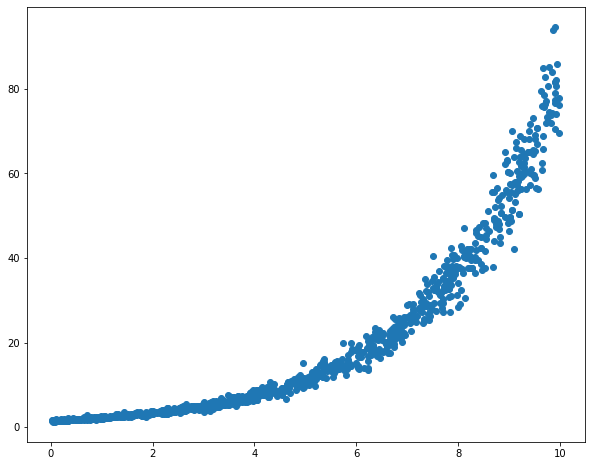

In [26]:
plt.figure(figsize = (10,8))
plt.scatter(x, y)


In [27]:
lny

0      0.450733
1      0.403573
2      0.260190
3      0.349979
4      0.483800
         ...   
995    4.389593
996    4.452276
997    4.242523
998    4.331882
999    4.356127
Name: y, Length: 1000, dtype: float64

In [28]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
#lny2 = lny[:, np.newaxis]

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),lny)
print("coeficiente alpha :", alpha[1], "coeficiente beta:", alpha[0])

coeficiente alpha : 0.38915640228731 coeficiente beta: 0.4021900885555076


**Respuesta c)** los coeficientes encontrados son: $\alpha$ : 0.38915640228731  $\beta$: 0.4021900885555076

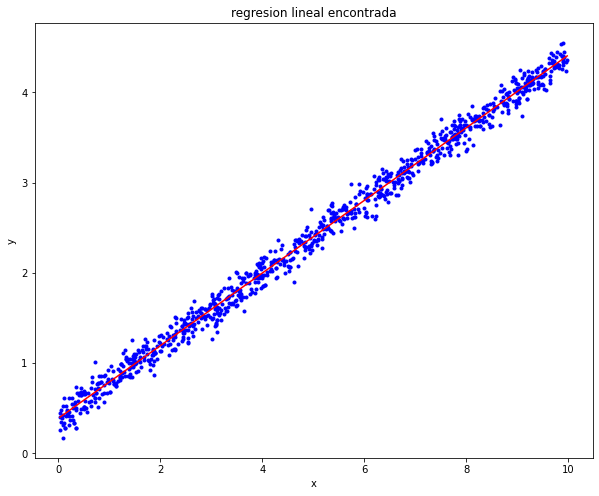

In [29]:
# plot the results

plt.figure(figsize = (10,8))
plt.title("regresion lineal encontrada")
plt.plot(x, lny, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Acá tenemos la regresion lineal solicitada, con los coeficientes $\alpha = 0.38915640228731$ y $\beta = 0.4021900885555076$, ahora en el paso D) procedemos a reescribir de la forma de regresion exponencial:
$$
y = \alpha e^{\beta x}
$$

**Respuesta D)** Grafique con el conjunto de datos, y la regresion exponencial encontrada con los coeficientes $\alpha$ y $\beta$

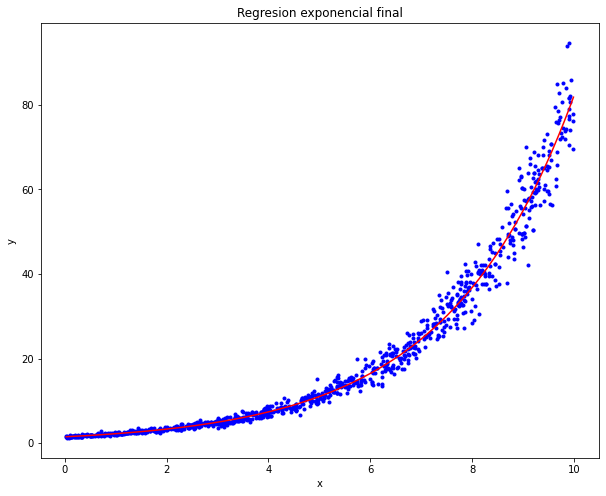

In [30]:
# Calculemos beta
beta = alpha[0]
alfa = np.exp(alpha[1])

#Grafiquemos:
plt.figure(figsize = (10,8))

plt.title("Regresion exponencial final")
plt.plot(x, y, 'b.')
plt.plot(x, alfa*np.exp(beta*x) , 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**PREGUNTA 2- Red Neuronal basica:**

**Respuesta A)** Considerando la funcion de activación $$\sigma(t) = tanh(y)$$ encuentre su derivada:

Desarrollando con x = t


$$
\tanh x=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$
$\frac{d}{d x} \tanh x$
$$
\begin{aligned}
&=\frac{-\left(e^{x}-e^{-x}\right)\left(e^{x}-e^{-x}\right)+\left(e^{x}+e^{-x}\right)\left(e^{x}+e^{-x}\right)}{\left(e^{x}+e^{-x}\right)^{2}} \\
&=\frac{\left(e^{x}+e^{-x}\right)^{2}-\left(e^{x}-e^{-x}\right)^{2}}{\left(e^{x}+e^{-x}\right)^{2}} \\
&=\frac{\left(e^{x}+e^{-x}\right)^{2}\left(1-\left(\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}\right)^{2}\right)}{\left(e^{x}+e^{-x}\right)^{2}} \\
&=1-\tanh ^{2} x=\operatorname{sech}^{2} x
\end{aligned}
$$
Por lo tanto,  $$\sigma^{\prime}(t) = sech^2(t)$$


**Respuesta B)** Considerando los datos de entrenamiento 3 columnas, parametros $u_{i}$, $v_{i}$ y $w_{i}$ el $i-ésimo$ elemento fila de la tabla leida por pandas. se construye la $funcion_J = J(a,b,c,d,e)$ , como la funcion de perdida de error cuadratico medio.

In [51]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

#Leer archivo local
import csv
import numpy as np

with open('P2grupo_5.csv', 'r') as f:
    data = list(csv.reader(f, delimiter=","))

data2 = data
#print(data2)

# se define la funcion_j

def funcion_j(a,b,c,d,e):

    aux = 0
    filas = len(data2)
    for d1 in data2:

        #definimos las variablas por cada iesimo dato
        u_i = float(d1[0])
        v_i = float(d1[1])
        w_i = float(d1[2])
        #print(u_i, v_i, w_i)
        #print(a,b,c,d,e)
        
        # definimos el error como la resta del valor a predecir y la funcion de activación entre ponderada como en el enunciado con Y y Z
        
        #print((a*u_i))
        #print((b*v_i))
        #print(d)

        y = np.tanh((a*u_i) + (b*v_i) +d)
        z = np.tanh((c*y) + e)

        
        error = w_i - z
        error2 = error*error #error cuadratico del i-esimo elemento
        aux = aux+error2
    
    error_medio = aux/filas


    return error_medio



Calculamos el gradiente de J, con sus derivadas parciales de cada componente a,b,c,d,e
Considerando $J$ la funcion del error cuadratico medio definida como: $J(a,b,c,d,e) = (w -\tanh( c \dot (\tanh(a \cdot u + b \cdot v + d)) + e))^{2}$

$\nabla J = ( \frac{\partial J}{\partial a}, \frac{\partial J}{\partial b}, \frac{\partial J}{\partial c}, \frac{\partial J}{\partial d}, \frac{\partial J}{\partial e})$

$\frac{\partial J}{\partial a} = -2 c u \operatorname{sech}^{2}(a u+b v+d)(w-\tanh (c \tanh (a u+b v+d)+e)) \operatorname{sech}^{2}(c \tanh (a u+b v+d)+e)$


$\frac{\partial J}{\partial a} = -2 c v \operatorname{sech}^{2}(a u+b v+d)(w-\tanh (c \tanh (a u+b v+d)+e)) \operatorname{sech}^{2}(c \tanh (a u+b v+d)+e)$


$\frac{\partial J}{\partial c} = -2 \tanh (a u+b v+d)(w-\tanh (c \tanh (a u+b v+d)+e)) \operatorname{sech}^{2}(c \tanh (a u+b v+ d)+e)$


$\frac{\partial J}{\partial d} = -2 c \operatorname{sech}^{2}(a u+b v+d)(w-\tanh (c \tanh (a u+b v+d)+e)) \operatorname{sech}^{2}(c \tanh (a u+b v+d)+e)$


$\frac{\partial J}{\partial e} = -2(w-\tanh (c \tanh (a u+b v+d)+e)) \operatorname{sech}^{2}(c \tanh (a u+b v+d)+e)$

Luego se define la funcion en python cs := $sech^{2}(x) = (\frac{1}{cosh(x)})^{2}$, ya que numpy no la tiene incorporada, posteriormente se hace el gradiente con las derivadas parciales calculadas:

In [52]:
def cs(x):
    val = (1/(np.cosh(x)))**2
    return val

def grad_j(a,b,c,d,e):

    lista=[0,0,0,0,0]
    filas = len(data2)

    for d1 in data2:

        #definimos las variablas por cada iesimo dato
        u = float(d1[0])
        v = float(d1[1])
        w = float(d1[2])

        lista[0] = lista[0] + (-2*c*u*cs(d+a*u+b*v) * cs(e+c*np.tanh(d + a*u +b*v)) * (w-np.tanh(e+c*np.tanh(d+a*u+b*v))))
        lista[1] = lista[1] + (-2*c*v*cs(d+a*u+b*v)*cs(e+c*np.tanh(d+a*u+b*v)) * (w-np.tanh(e+c*np.tanh(d+a*u+b*v))))
        lista[2] = lista[2] + (-2*cs(e+c*np.tanh(d+a*u+b*v))*np.tanh(d+a*u+b*v)*(w-np.tanh(e+c*np.tanh(d+a*u+b*v))))
        lista[3] = lista[3] + (-2*c*cs(d+a*u+b*v)*cs(e+c*np.tanh(d+a*u+b*v))*(w-np.tanh(e+c*np.tanh(d+a*u+b*v))))
        lista[4] = lista[4] + (-2*cs(e+c*np.tanh(d+a*u+b*v))*(w-np.tanh(e+c*np.tanh(d+a*u+b*v))))

    return lista[0]/filas,lista[1]/filas, lista[2]/filas, lista[3]/filas, lista[4]/filas

**Respuesta C)** Inicialice los pesos y sesgos de la red neuronal asignandoles valores entre [-5, 5] a los parametros iniciales

In [53]:
import random
#consideremos valores aleatorios

a0 = random.uniform(-5, 5)
b0 = random.uniform(-5, 5)
c0 = random.uniform(-5, 5)
d0 = random.uniform(-5, 5)
e0 = random.uniform(-5, 5)
print("los puntos iniciales son: ", a0,',',b0,',',c0,',',d0,',',e0)


print("El valor de J evaluado en los puntos iniciales es :", funcion_j(a0,b0,c0,d0,e0))




los puntos iniciales son:  2.0328338240831823 , -0.48293727989657054 , 4.6666055696578255 , 2.3956637770062965 , -4.202524249521671
El valor de J evaluado en los puntos iniciales es : 1.435175125604945


**Respuesta D)** Programe un algoritmo de descenso del gradiente y muestre su grafico con la evolucion del error con 1000 epochs

In [45]:
resultado = []
epsilon = 0.1
i = 0

while i < 1000:

    

    aprima,bprima,cprima,dprima,eprima = grad_j(a0,b0,c0,d0,e0)
    a0 = a0-(aprima*epsilon)
    b0 = b0-(bprima*epsilon)
    c0 = c0-(cprima*epsilon)
    d0 = d0-(dprima*epsilon)
    e0 = e0-(eprima*epsilon)
    
    i=i+1

    resultado.append(funcion_j(a0,b0,c0,d0,e0))
    print("epochs: ", i, "error :",resultado[-1])


epochs:  1 error : 1.8592431037424146
epochs:  2 error : 1.848784569812386
epochs:  3 error : 1.8380617406590123
epochs:  4 error : 1.8269011955508843
epochs:  5 error : 1.8151157528938737
epochs:  6 error : 1.8025285002652898
epochs:  7 error : 1.7889832595955597
epochs:  8 error : 1.7743512333671374
epochs:  9 error : 1.7585396621120133
epochs:  10 error : 1.741506078788822
epochs:  11 error : 1.7232795655116162
epochs:  12 error : 1.703987631562434
epochs:  13 error : 1.683883230710007
epochs:  14 error : 1.6633612811636231
epochs:  15 error : 1.642950173968921
epochs:  16 error : 1.6232657743414256
epochs:  17 error : 1.6049274277613046
epochs:  18 error : 1.5884551800201028
epochs:  19 error : 1.574182945008044
epochs:  20 error : 1.5622196880836716
epochs:  21 error : 1.5524684328720044
epochs:  22 error : 1.5446866120237541
epochs:  23 error : 1.5385588084574162
epochs:  24 error : 1.5337580902458126
epochs:  25 error : 1.5299855671075255
epochs:  26 error : 1.5269890927121321
e

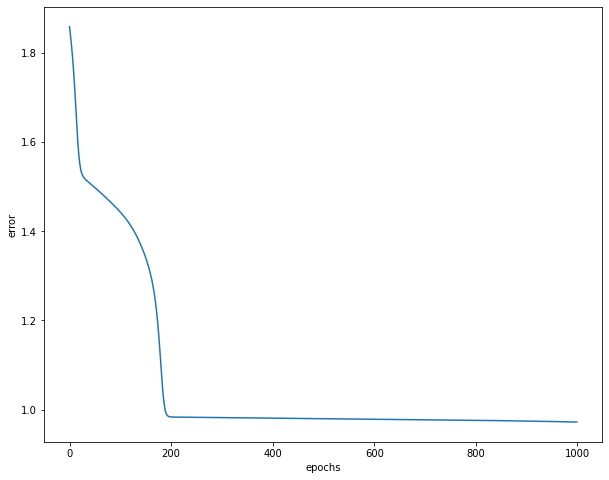

In [46]:
plt.figure(figsize = (10,8))


plt.plot(resultado)
plt.ylabel('error')
plt.xlabel('epochs')
plt.show()

**Resultado E)** Muestre los coeficientes $a_{1000}, b_{1000}, c_{1000}, d_{1000}, e_{1000}$

In [47]:
print("Los valores solicitados como ultimo valores son: ", a0,b0,c0,d0,e0)

Los valores solicitados como ultimo valores son:  0.9863038438308486 2.9692073297083206 -0.1741439077170966 2.0234900597830614 0.034034917535947125
